In [1]:
from keras import models
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv(r'D:\Machine Learning\Deep-Learning\Projects\Classify Points\Data\Logistic_X_Train.csv')
Y_train = pd.read_csv(r'D:\Machine Learning\Deep-Learning\Projects\Classify Points\Data\Logistic_Y_Train.csv')
X_test = pd.read_csv(r'D:\Machine Learning\Deep-Learning\Projects\Classify Points\Data\Logistic_X_Test.csv')

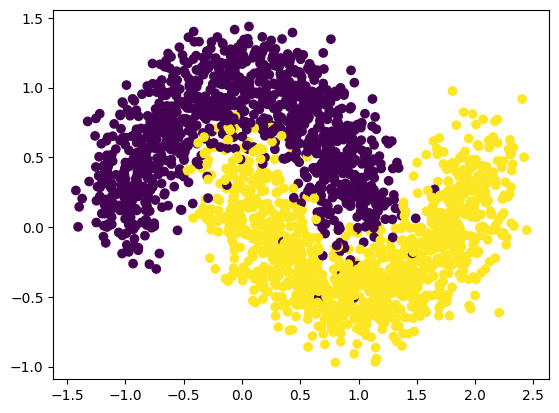

In [3]:
plt.scatter(X_train['f1'],X_train['f2'],c=Y_train['label'])

In [4]:
temp = X_train.add(Y_train, fill_value=0)
temp

,f1,f2,label
0,0.574727,0.787277,0.0
1,0.251502,0.908940,0.0
2,1.860578,0.013763,1.0
3,0.019477,1.047210,0.0
4,0.029794,0.252236,1.0
...,...,...,...
2245,1.694862,0.031078,1.0
2246,-0.015928,-0.145282,1.0
2247,0.441794,-0.387912,1.0
2248,0.219570,-0.117130,1.0


In [5]:
# For yellow colour label- 1
# For purple colour label- 0

In [6]:
XT = np.array(X_train)
YT = np.array(Y_train)
Xt = np.array(X_test)

In [7]:
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(2,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# creating a validation set
x_val = XT[:1900]
x_train_new = XT[1900:]

y_val = YT[:1900]
y_train_new = YT[1900:]

In [11]:
hist = model.fit(x_train_new,y_train_new,epochs=500,batch_size=206,validation_data=(x_val,y_val))

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.6184 - accuracy: 0.5057 - val_loss: 0.6155 - val_accuracy: 0.4963
Epoch 2/500
1/1 [==============================] - 0s 47ms/step - loss: 0.6096 - accuracy: 0.5000 - val_loss: 0.6099 - val_accuracy: 0.5447
Epoch 3/500
1/1 [==============================] - 0s 46ms/step - loss: 0.6035 - accuracy: 0.5514 - val_loss: 0.6054 - val_accuracy: 0.5511
Epoch 4/500
1/1 [==============================] - 0s 48ms/step - loss: 0.5985 - accuracy: 0.5543 - val_loss: 0.6015 - val_accuracy: 0.5542
Epoch 5/500
1/1 [==============================] - 0s 49ms/step - loss: 0.5941 - accuracy: 0.5600 - val_loss: 0.5980 - val_accuracy: 0.5626
Epoch 6/500
1/1 [==============================] - 0s 48ms/step - loss: 0.5902 - accuracy: 0.5714 - val_loss: 0.5947 - val_accuracy: 0.5942
Epoch 7/500
1/1 [==============================] - 0s 47ms/step - loss: 0.5866 - accuracy: 0.5914 - val_loss: 0.5917 - val_accuracy: 0.6226
Epoch 8/500
1/1 [=====

In [12]:
h = hist.history
h

{'loss': [0.6184104084968567,
  0.6096097230911255,
  0.6034728288650513,
  0.5984708666801453,
  0.5941390991210938,
  0.5902388095855713,
  0.5866435170173645,
  0.5832825303077698,
  0.5801215767860413,
  0.5771093964576721,
  0.5742437243461609,
  0.5715036988258362,
  0.5688453912734985,
  0.566260814666748,
  0.5637416243553162,
  0.5612716674804688,
  0.5588713884353638,
  0.5565097332000732,
  0.5541837215423584,
  0.5519128441810608,
  0.5496997833251953,
  0.5475209951400757,
  0.5453633069992065,
  0.5432412624359131,
  0.541161060333252,
  0.5391073822975159,
  0.5370692014694214,
  0.5350428819656372,
  0.5330274701118469,
  0.5310471057891846,
  0.5290859341621399,
  0.5271334648132324,
  0.525193452835083,
  0.5232447385787964,
  0.5213133096694946,
  0.5193836092948914,
  0.5174508690834045,
  0.5155639052391052,
  0.5137120485305786,
  0.5118737816810608,
  0.5100611448287964,
  0.5082727670669556,
  0.5064918994903564,
  0.5047247409820557,
  0.5029790997505188,
  0.5

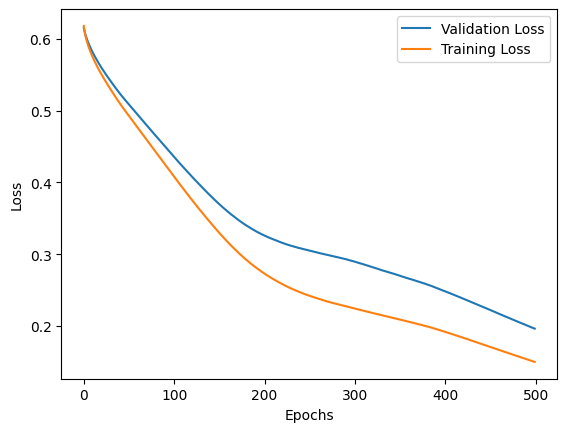

In [13]:
plt.plot(h['val_loss'],label='Validation Loss')
plt.plot(h['loss'],label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

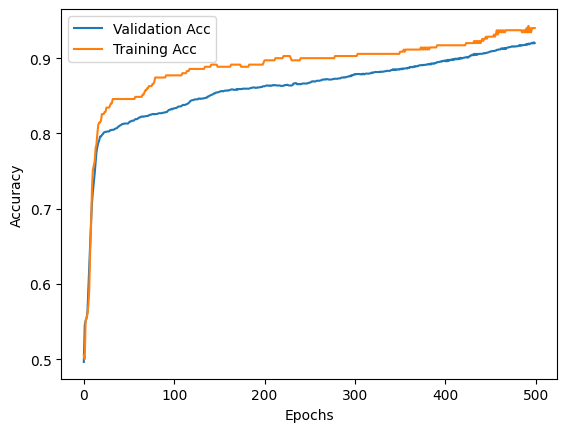

In [14]:
plt.plot(h['val_accuracy'],label='Validation Acc')
plt.plot(h['accuracy'],label='Training Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
model.evaluate(X_train,Y_train)

71/71 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9236


[0.1887751668691635, 0.9235555529594421]

In [15]:
predictions = model.predict(Xt)
binary_predictions = (predictions > 0.5).astype(int)
binary_predictions.shape

24/24 [==============================] - 0s 1ms/step


(750, 1)

In [16]:
type(binary_predictions)

numpy.ndarray

In [18]:
# File path to save CSV
file_path = "output.csv"

# Save NumPy array to CSV
np.savetxt(file_path, binary_predictions, delimiter=",",fmt='%d',header="label")